In [ ]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
data=pd.read_csv("/content/Wine Quality Prediction CSV File.csv")

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Data Analysis and Visualisation

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


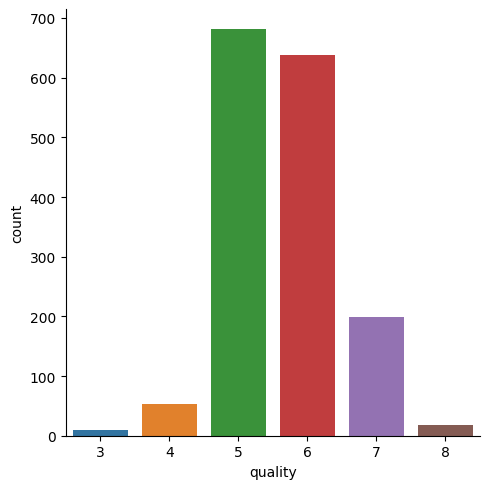

In [ ]:
 #number of values for each quality
 sns.catplot(x="quality",data=data,kind="count")

In [ ]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='volatile acidity'>

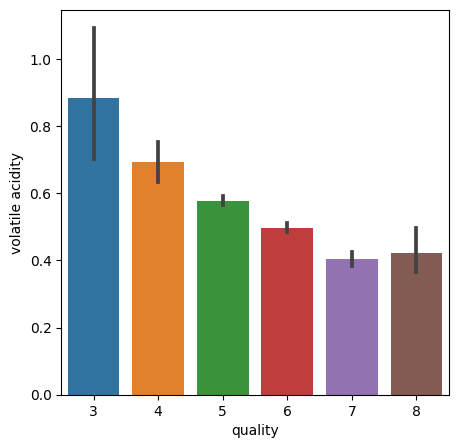

In [ ]:
#comparing volatile acidity versus quality column
plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="volatile acidity",data=data)

In [ ]:
#Inference from above graph: If the volatile acidity is high then the quality is poor around 3 or 4 but if the volatile acidity is low around 0.5 then quality is high. volatile acidity and quality is inversely proportional

<Axes: xlabel='quality', ylabel='citric acid'>

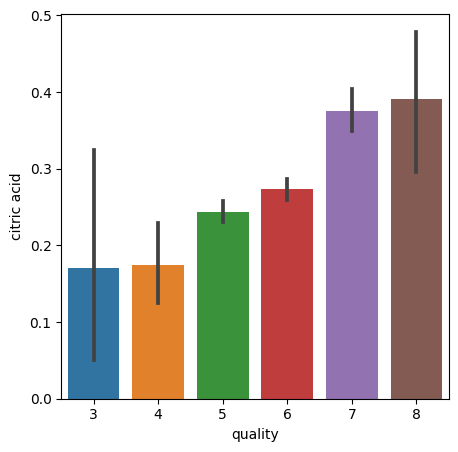

In [ ]:
#Comparing Citric acid quality
plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="citric acid",data=data)

In [ ]:
#Inference: citric acid and quality are directly proportional to each other

<Axes: xlabel='quality', ylabel='alcohol'>

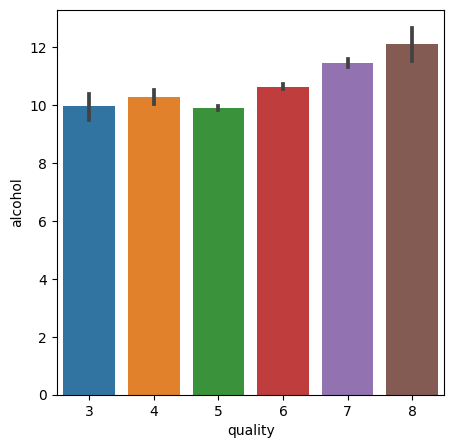

In [ ]:
#Comparing alcohol and quality
plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="alcohol",data=data)

In [ ]:
#Correlation

<Axes: >

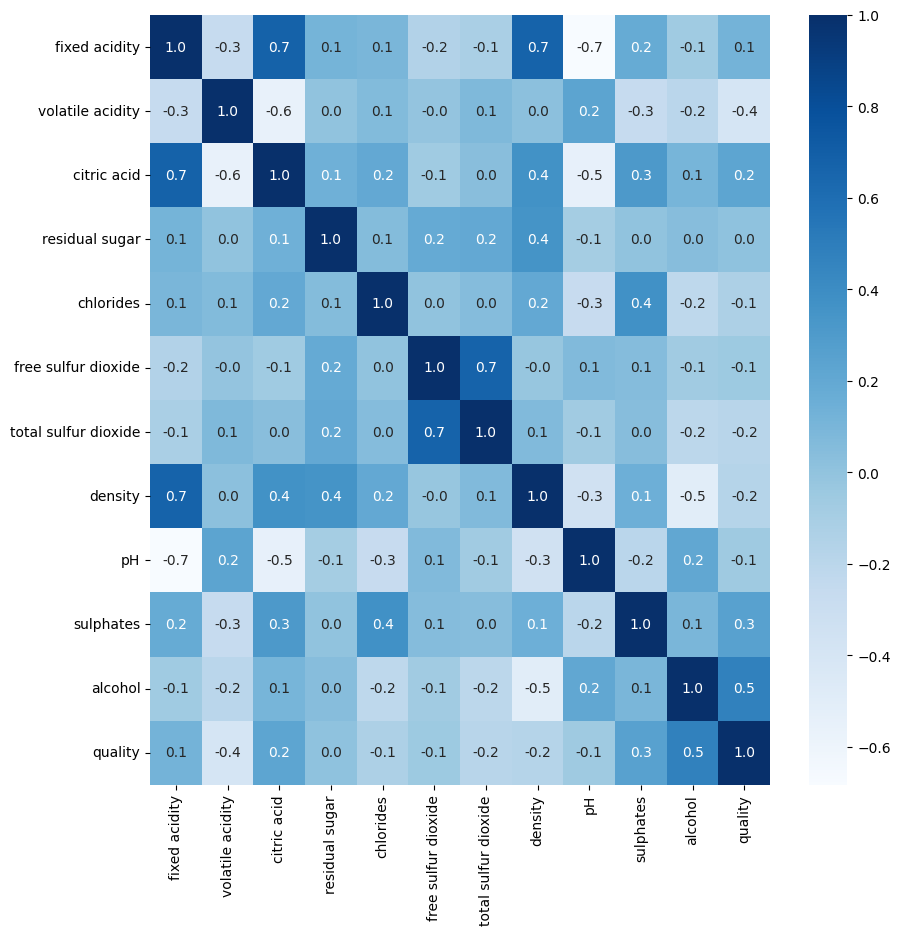

In [ ]:
#Correlation of all columns with quality column
correlation=data.corr()
#Constructing a heat map to understand correlation between columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,fmt='0.1f',cmap='Blues')

In [ ]:
#Dark colour: High correlation
#Light colour: Inversely proportional
#Ignore diagonal column as they are reltion with themselves

In [ ]:
#Data Preprocessing
x=data.drop("quality",axis=1)
y=data.quality

In [ ]:
print(x,y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
#Label binarisation
#converting into two values
#if quality>=7 then good, if quality<7 then bad quality
y=data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [ ]:
#Split the data into train and test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(y.shape,y_train.shape,x_train.shape,x_test.shape,y_test.shape)

(1599,) (1279,) (1279, 11) (320, 11) (320,)


In [ ]:
#Training our model
#RandomForestClassifier Model

In [ ]:
model=RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#Model Evaluation
#accuracy on test data
x_test_prediction=model.predict(x_test)
#Compare original label values(y_test) with training data predictions
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
x_train_prediction=model.predict(x_train)
train_data_accuracy=accuracy_score(x_train_prediction,y_train)
print(train_data_accuracy)
from sklearn import metrics
cf=metrics.confusion_matrix(x_test_prediction,y_test)
print(cf)
cr=classification_report(x_test_prediction,y_test)
print(cr)

1.0
[[270  17]
 [  9  24]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       287
           1       0.59      0.73      0.65        33

    accuracy                           0.92       320
   macro avg       0.78      0.83      0.80       320
weighted avg       0.93      0.92      0.92       320



In [ ]:
print("Accuracy:",test_data_accuracy)

Accuracy: 0.91875


In [ ]:
#Building a predictive system
input_data=(7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)
input_data_asarray=np.asarray(input_data)
input_data_reshape=input_data_asarray.reshape(1,-1)
prediction=model.predict(input_data_reshape)
print(prediction)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Applying KFold
kfold_validation=KFold(10)
results=cross_val_score(model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.9625     0.925      0.84375    0.85625    0.96875    0.78125
 0.76875    0.8875     0.93125    0.91823899]
0.8843238993710691


In [ ]:
#Applying Stratified KFold
skf=StratifiedKFold(n_splits=5)
results=cross_val_score(model,x,y,cv=skf)
print(results)
print(np.mean(results))

[0.875      0.84375    0.871875   0.86875    0.87147335]
0.866169670846395


In [ ]:
#Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(max_iter=500)
logr.fit(x_train,y_train)
prediction=logr.predict(x_test)
print(accuracy_score(prediction,y_test))

0.8875
